# Book Recommendation System - Part III
## by: Amir Momen-Roknabadi
### The Data Incubator - June 2021 Part Time Cohort

### Training of the optimized model:
After tuining the parameters, I need to train the model based on the optimized parameters:

In [2]:
import pandas as pd
import numpy as np
import math
import glob
from sklearn.preprocessing import LabelEncoder
from plotnine import *
import random
from Model_twostate import *
from torchsummary import summary
from IPython.display import Image
df_train = pd.read_csv('/mnt/data1/amir/Amazon/Amazontrain-20percent.csv', index_col=0, header=0)
df_valid = pd.read_csv('/mnt/data1/amir/Amazon/Amazonvalid-20percent.csv', index_col=0, header=0)
df_test = pd.read_csv('/mnt/data1/amir/Amazon/Amazontest-20percent.csv', index_col=0, header=0)
rating=pd.read_csv('/mnt/data1/amir/Amazon/Rating.csv', index_col=0, header=0)
print(df_train.shape, df_valid.shape, df_test.shape)
books_size=5860902
users_size=30725236


/home/amir/.local/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


(2855214, 7) (160639, 7) (321278, 7)


In [61]:
train_data_loader = DataLoader(torch.utils.data.TensorDataset(torch.from_numpy(df_train["Book_id"].values), torch.from_numpy(df_train["NumericID"].values), torch.from_numpy(df_train["NumericRating"].values)), batch_size=128, shuffle=True, drop_last=True)
valid_data_loader = DataLoader(torch.utils.data.TensorDataset(torch.from_numpy(df_valid["Book_id"].values), torch.from_numpy(df_valid["NumericID"].values), torch.from_numpy(df_valid["NumericRating"].values)), batch_size=128, shuffle=False, drop_last=False)


In [62]:
 
if torch.cuda.is_available():
    device = torch.device("cuda") 
else:
    device = torch.device("cpu")
model = BookRecommender(books_size=books_size, users_size=users_size, pdropbooks=0.7, pdropusers = 0.1, pdropfc=0.5, books_dim=12,  users_dim=12, fchidden1=16, fchidden2=32, lr =0.00217058)
print(model)

BookRecommender(
  (booklayer): Sequential(
    (0): Embedding(5860902, 12)
    (1): Dropout(p=0.7, inplace=False)
  )
  (userlayer): Sequential(
    (0): Embedding(30725236, 12)
    (1): Dropout(p=0.1, inplace=False)
  )
  (conv_block_1): Sequential(
    (0): Conv1d(8, 1, kernel_size=(10,), stride=(1,), padding=(10,))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool1d(kernel_size=10, stride=5, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.2, inplace=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=24, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=16, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [63]:
device
model.compile(device=device)
logfile = open('models/Amazonhistory3.log', 'at', buffering=1)

I removed the output for the following cell to aid with the readability.

In [ ]:
hist = model.train_model(train_data_loader,val_loader=valid_data_loader, epochs=40, device=device, logfile=logfile)

In [65]:
hist_df = pd.DataFrame([hist['valid_loss'], hist['valid_accs']]).T
print(hist_df.head())
hist_df.shape

          0         1
0  0.623302  0.666795
1  0.582029  0.703900
2  0.565730  0.722662
3  0.547944  0.729894
4  0.569199  0.733434


(40, 2)

/home/amir/.local/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 3 x 3 in image.
/home/amir/.local/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: AmazonCorrelation.pdf


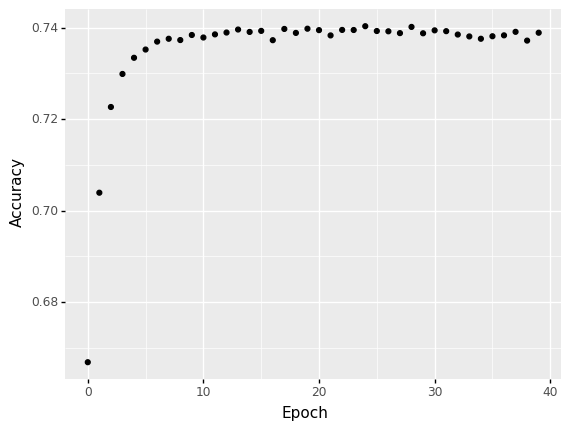

<ggplot: (-9223363252921530364)>

In [66]:
hist_df.columns=['Loss','Accs']

plot = (
    ggplot(hist_df, aes(x=hist_df.index.tolist(), y='Accs')) +
    geom_point()+
    xlab("Epoch")+
    ylab("Accuracy")
)
plot.save('AmazonCorrelation.pdf', width=3, height=3)
plot

After training the model, I will check its efficacy on the test set:

In [2]:
import ray
from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
from torchsummary import summary
import pandas as pd
import numpy as np
import math
import glob
from sklearn.preprocessing import LabelEncoder
from plotnine import *
import random
import os
from Model_twostate import *
from torchsummary import summary
from IPython.display import Image
df_train = pd.read_csv('/mnt/data1/amir/Amazon/Amazontrain-20percent.csv', index_col=0, header=0)
df_valid = pd.read_csv('/mnt/data1/amir/Amazon/Amazonvalid-20percent.csv', index_col=0, header=0)
df_test = pd.read_csv('/mnt/data1/amir/Amazon/Amazontest-20percent.csv', index_col=0, header=0)
rating=pd.read_csv('/mnt/data1/amir/Amazon/Rating.csv', index_col=0, header=0)
books_size=5860902#rating['Book_id'].nunique()*2
users_size=30725236#

In [3]:
%config Completer.use_jedi = False 

In [4]:
if torch.cuda.is_available():
    device = torch.device("cuda") 
else:
    device = torch.device("cpu")
model = BookRecommender(books_size=books_size, users_size=users_size, pdropbooks=0.7, pdropusers = 0.1, pdropfc=0.5, books_dim=12,  users_dim=12, fchidden1=16, fchidden2=32, lr =0.00217058)
print(model)
model.compile(device=device)

BookRecommender(
  (booklayer): Sequential(
    (0): Embedding(5860902, 12)
    (1): Dropout(p=0.7, inplace=False)
  )
  (userlayer): Sequential(
    (0): Embedding(30725236, 12)
    (1): Dropout(p=0.1, inplace=False)
  )
  (conv_block_1): Sequential(
    (0): Conv1d(8, 1, kernel_size=(10,), stride=(1,), padding=(10,))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool1d(kernel_size=10, stride=5, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.2, inplace=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=24, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=16, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [5]:
test_data_loader = DataLoader(torch.utils.data.TensorDataset(torch.from_numpy(df_test["Book_id"].values), torch.from_numpy(df_test["NumericID"].values), torch.from_numpy(df_test["NumericRating"].values)), batch_size=1028, shuffle=False, drop_last=False)

In [6]:
model.load_model('models/best_ret_checkpoint.pt')

In [7]:
model.eval()
target_list = []
pred_list = []
with torch.no_grad():
    for batch_idx, batch in enumerate(test_data_loader):
        books,users, ratings = batch
        books = books.to(device)
        users = users.to(device)
        out = model(books, users)
        pred_list.append(out.to('cpu').detach().numpy())
        target_list.append(ratings.to('cpu').detach().numpy())
    targets = np.concatenate(target_list)
    preds = np.concatenate(pred_list)
    valid_acc = accuracy2(preds, targets)

In [8]:
valid_acc

0.7278114631524838

In [9]:
test_df = pd.DataFrame(zip(targets, sigm_on_pred(preds).numpy()))
test_df.columns = ['targets', 'preds']
test_df.head()

,targets,preds
0,0,0.718370
1,1,0.676368
2,1,0.794160
3,1,0.636644
4,1,0.508639


In [10]:
print(len(df_valid.loc[df_valid['Rating']<0.5])/len(df_valid))
print(len(df_valid.loc[df_valid['Rating']>0.5])/len(df_valid))

0.3514650217299874
0.6485349782700126


/home/amir/.local/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 3 x 3 in image.
/home/amir/.local/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: AmazonTest_targets_vs_predictions.pdf


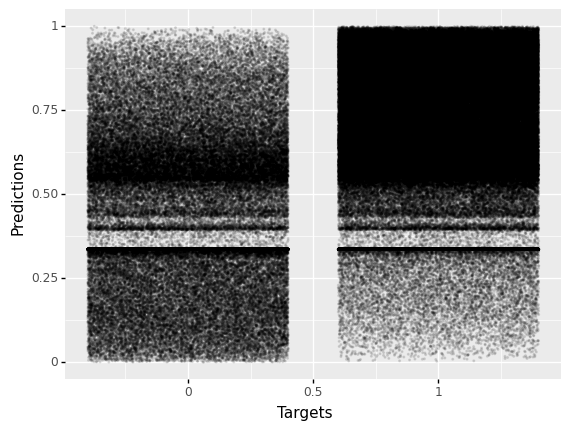

<ggplot: (-9223363253142178055)>

In [76]:
plot = (
    ggplot(test_df, aes(x='targets', y='preds')) +
    geom_jitter(alpha=0.1,shape='.',size=1)+
    xlab("Targets")+
    ylab("Predictions")
)
plot.save('AmazonTest_targets_vs_predictions.pdf', width=3, height=3)
plot


In [78]:
summary_test_ratings=df_test[['ID', 'NumericRating']].groupby(['NumericRating']).agg(['count'])
summary_test_ratings.columns=["counts"]
summary_test_ratings

,counts
NumericRating,
0,117786
1,224598


My model achieves an accuracy of 72.7% on the test set. Now, I will see if I can use this model to recommend books to a new user.